In [907]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 120

# Show all columns
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [908]:
df_LR = pd.read_csv('results_LIME/personality_traits_results - LIME_LR.csv', index_col=None)
df_SVM = pd.read_csv('results_LIME/personality_traits_results - LIME_SVM.csv', index_col=None)
df_KNN = pd.read_csv('results_LIME/personality_traits_results - LIME_KNN.csv', index_col=None)
df_LDA = pd.read_csv('results_LIME/personality_traits_results - LIME_LDA.csv', index_col=None)
df_RF = pd.read_csv('results_LIME/personality_traits_results - LIME_RF.csv', index_col=None)

# Number of test instances
num_test_instances = 35

# Create Empty Dataframes for each trait
df = dict()
df['Emotional Stability'] = pd.DataFrame(columns=['Classifier','Feature','Value'])
df['Extraversion'] = pd.DataFrame(columns=['Classifier','Feature','Value'])
df['Openness'] = pd.DataFrame(columns=['Classifier','Feature','Value'])
df['Conscientiousness'] = pd.DataFrame(columns=['Classifier','Feature','Value'])
df['Agreeableness'] = pd.DataFrame(columns=['Classifier','Feature','Value'])

In [909]:
def build_dataframe(clf_name, df, trait, feature):
    df = df[df['trait'] == trait][feature].value_counts()
    
    # Create dataframe to accomudate the results
    size = len(df)
    size = np.zeros((size,3))
    df_result = pd.DataFrame(size,columns=['Classifier','Feature','Value'])
    df_result['Classifier'] = clf_name
    
    df_result['Feature'] = df.index.values
    df_result['Value'] = df.values
    
    return df_result

def build_dataframe_trait(df, trait, feature):
    df[trait] = pd.concat([df[trait],build_dataframe('LR', df_LR, trait, feature)])
    df[trait] = pd.concat([df[trait],build_dataframe('SVM', df_SVM, trait, feature)])
    df[trait] = pd.concat([df[trait],build_dataframe('KNN', df_KNN, trait, feature)])
    df[trait] = pd.concat([df[trait],build_dataframe('LDA', df_LDA, trait, feature)])
    df[trait] = pd.concat([df[trait],build_dataframe('RF', df_RF, trait, feature)])

def reverse_dataframe(df, trait):
    categories = df[trait]['Feature'].unique()

    data = np.zeros((5,len(categories)), dtype=int)
    data = pd.DataFrame(data=data, columns=categories)
    data['Classifier'] = pd.Series(['LR','SVM','KNN','LDA','RF'])

    for row in df[trait].iterrows():
        clf = row[1]['Classifier']
        feature = row[1]['Feature']
        value = row[1]['Value']
        data.loc[data['Classifier'] == clf, feature] = value
        
    return data    

In [910]:
df_rev = dict()
feature = 'most_contribute'

for trait in ['Emotional Stability','Extraversion','Openness','Conscientiousness','Agreeableness']:
    build_dataframe_trait(df,trait, feature)
    df_rev[trait] = reverse_dataframe(df, trait)

df['Extraversion']

,Classifier,Feature,Value
0,LR,dur_Shopping,25
1,LR,freq_Shopping,6
2,LR,freq_Medical,3
3,LR,freq_Unknown,1
0,SVM,freq_Unknown,19
1,SVM,freq_Social,15
2,SVM,freq_Communication,1
0,KNN,freq_Communication,26
1,KNN,freq_Unknown,6
2,KNN,freq_Social,3


In [911]:
df_rev['Extraversion'] #.set_index(['Classifier'])

,dur_Shopping,freq_Shopping,freq_Medical,freq_Unknown,freq_Social,freq_Communication,dur_Personalization,freq_calls,freq_Music...Audio,dur_Productivity,dur_calls,Classifier
0,25,6,3,1,0,0,0,0,0,0,0,LR
1,0,0,0,19,15,1,0,0,0,0,0,SVM
2,0,0,0,6,3,26,0,0,0,0,0,KNN
3,0,0,0,3,0,0,26,6,0,0,0,LDA
4,15,0,0,0,0,0,0,17,1,1,1,RF


# Feature that most Influenced each test instance prediction

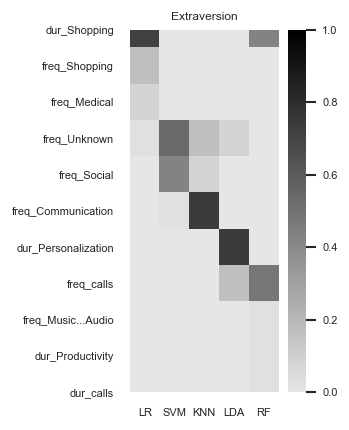

In [729]:
sns.set(font_scale=0.6)
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)

data = df_rev['Extraversion'].iloc[:,0:-1].transpose() / num_test_instances
data.columns = ['LR','SVM','KNN','LDA','RF']
plt.figure(figsize=(2, 4))
ax = sns.heatmap(data, cmap=cmap, linewidths=0, vmin=0, vmax=1)
ax.set_title('Extraversion')
plt.savefig('figures/heatmap-LIME-top-1-feature-Extraversion.png', dpi=300, bbox_inches="tight")

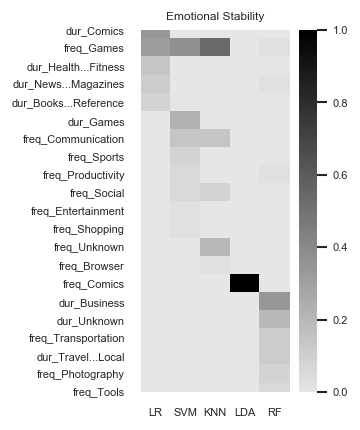

In [730]:
data = df_rev['Emotional Stability'].iloc[:,0:-1].transpose() / num_test_instances
data.columns = ['LR','SVM','KNN','LDA','RF']
plt.figure(figsize=(2, 4))
ax = sns.heatmap(data, cmap=cmap, linewidths=0, vmin=0, vmax=1)
ax.set_title('Emotional Stability')
plt.savefig('figures/heatmap-LIME-top-1-feature-Emotional-Stability.png', dpi=300, bbox_inches="tight")

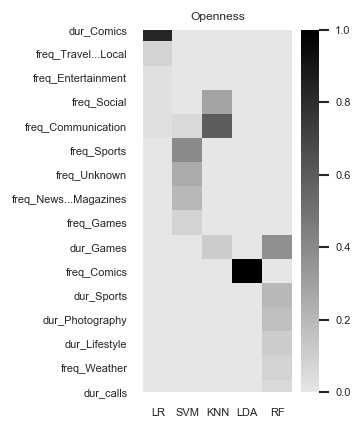

In [731]:
data = df_rev['Openness'].iloc[:,0:-1].transpose() / num_test_instances
data.columns = ['LR','SVM','KNN','LDA','RF']
plt.figure(figsize=(2, 4))
ax = sns.heatmap(data, cmap=cmap, linewidths=0, vmin=0, vmax=1)
ax.set_title('Openness')
plt.savefig('figures/heatmap-LIME-top-1-feature-Openness.png', dpi=300, bbox_inches="tight")

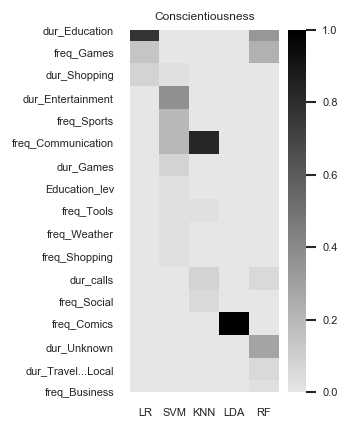

In [732]:
data = df_rev['Conscientiousness'].iloc[:,0:-1].transpose() / num_test_instances
data.columns = ['LR','SVM','KNN','LDA','RF']
plt.figure(figsize=(2, 4))
ax = sns.heatmap(data, cmap=cmap, linewidths=0, vmin=0, vmax=1)
ax.set_title('Conscientiousness')
plt.savefig('figures/heatmap-LIME-top-1-feature-Conscientiousness.png', dpi=300, bbox_inches="tight")

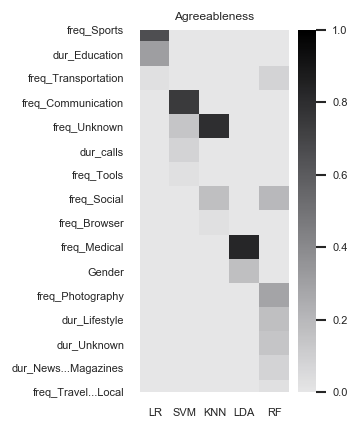

In [733]:
data = df_rev['Agreeableness'].iloc[:,0:-1].transpose() / num_test_instances
data.columns = ['LR','SVM','KNN','LDA','RF']
plt.figure(figsize=(2, 4))
ax = sns.heatmap(data, cmap=cmap, linewidths=0, vmin=0, vmax=1)
ax.set_title('Agreeableness')
plt.savefig('figures/heatmap-LIME-top-1-feature-Agreeableness.png', dpi=300, bbox_inches="tight")

11


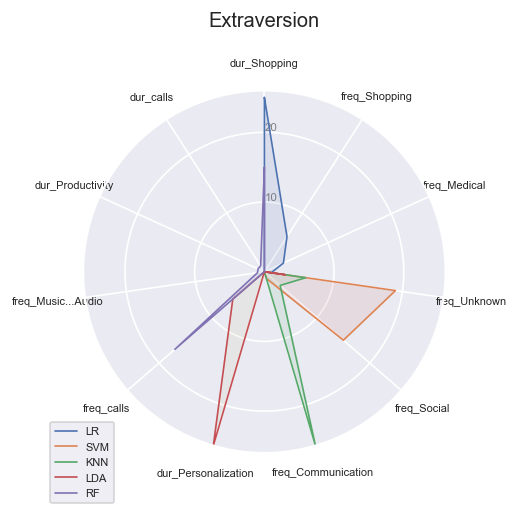

In [712]:
from math import pi

# ------- PART 1: Create background
 
# number of variable
categories = df['Extraversion']['Feature'].unique()
N = len(categories)
print(N)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
plt.ylim(0,26)

# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values=[25, 6, 3, 1, 0, 0, 0, 0, 0, 0, 0]
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="LR")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind2
values=[0, 0, 0, 19, 15, 1, 0, 0, 0, 0, 0]
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="SVM")
ax.fill(angles, values, 'r', alpha=0.1)

# Ind3
values=[0, 0, 0, 6, 3, 26, 0, 0, 0, 0, 0]
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="KNN")
ax.fill(angles, values, 'g', alpha=0.1)

# Ind4
values=[0, 0, 0, 3, 0, 0, 26, 6, 0, 0, 0]
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="LDA")
ax.fill(angles, values, 'y', alpha=0.1)

# Ind5
values=[15, 0, 0, 0, 0, 0, 0, 17, 1, 1, 1]
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="RF")
ax.fill(angles, values, 'p', alpha=0.1)
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
ax.set_title('Extraversion', y = 1.15, fontsize=12)
plt.savefig('figures/radar.png', dpi=500, bbox_inches="tight")

In [975]:
df_LR = pd.read_csv('results_LIME/personality_traits_results - LIME_LR.csv', index_col=None)
df_SVM = pd.read_csv('results_LIME/personality_traits_results - LIME_SVM.csv', index_col=None)
df_KNN = pd.read_csv('results_LIME/personality_traits_results - LIME_KNN.csv', index_col=None)
df_LDA = pd.read_csv('results_LIME/personality_traits_results - LIME_LDA.csv', index_col=None)
df_RF = pd.read_csv('results_LIME/personality_traits_results - LIME_RF.csv', index_col=None)

# Number of test instances
num_test_instances = 35

top5_features = ['most_contribute', 'most_contribute_2', 'most_contribute_3', 
                'most_contribute_4','most_contribute_5']

traits = ['Emotional Stability','Extraversion','Openness','Conscientiousness','Agreeableness']

clfs_name = ['LR','SVM','KNN','LDA','RF']

columns = ['Gender', 'Age', 'Education_lev', 'fluidIQ', 'freq_calls',
       'freq_Tools', 'freq_Finance', 'freq_Games', 'freq_Entertainment',
       'freq_Productivity', 'freq_Personalization',
       'freq_News...Magazines', 'freq_Unknown', 'freq_Photography',
       'freq_Shopping', 'freq_Communication', 'freq_Books...Reference',
       'freq_Travel...Local', 'freq_Music...Audio', 'freq_Medical',
       'freq_Education', 'freq_Business', 'freq_Lifestyle',
       'freq_Transportation', 'freq_Weather', 'freq_Sports',
       'freq_Browser', 'freq_Health...Fitness', 'freq_Media...Video',
       'freq_Social', 'freq_Comics', 'dur_calls', 'dur_Tools',
       'dur_Finance', 'dur_Games', 'dur_Entertainment',
       'dur_Productivity', 'dur_Personalization', 'dur_News...Magazines',
       'dur_Unknown', 'dur_Photography', 'dur_Shopping',
       'dur_Communication', 'dur_Books...Reference', 'dur_Travel...Local',
       'dur_Music...Audio', 'dur_Medical', 'dur_Education',
       'dur_Business', 'dur_Lifestyle', 'dur_Transportation',
       'dur_Weather', 'dur_Sports', 'dur_Browser', 'dur_Health...Fitness',
       'dur_Media...Video', 'dur_Social', 'dur_Comics']

In [988]:
# Create Empty Dataframes for each trait
df_top5_lr = dict()
df_top5_svm = dict()
df_top5_knn = dict()
df_top5_lda = dict()
df_top5_rf = dict()

def generate_data(trait, df_raw):
    size = np.zeros((len(top5_features),len(columns)) ,dtype=float)
    df = pd.DataFrame(data=size, columns=columns)
    row = 0
    for feature in top5_features:
        values = df_raw[df_raw['trait'] == trait][feature].value_counts()
        
        for val, count in values.iteritems():
            df[val][row] += count
        
        row += 1
    
    return df.copy()


def remove_empty_columns(_df, trait):
    df = _df[trait]

    df = df.loc[:, (df != 0).any(axis=0)]

    _df[trait] = df

    
def generate_25_matrixes():
    for trait in traits:
        for clf_name in clfs_name:
            if clf_name == 'LR':
                df_top5_lr[trait] = generate_data(trait, df_LR)
                remove_empty_columns(df_top5_lr, trait)
            elif clf_name == 'SVM':
                df_top5_svm[trait] = generate_data(trait, df_SVM)
                remove_empty_columns(df_top5_svm, trait)
            elif clf_name == 'KNN':
                df_top5_knn[trait] = generate_data(trait, df_KNN)
                remove_empty_columns(df_top5_knn, trait)
            elif clf_name == 'LDA':
                df_top5_lda[trait] = generate_data(trait, df_LDA)
                remove_empty_columns(df_top5_lda, trait)
            elif clf_name == 'RF':
                df_top5_rf[trait] = generate_data(trait, df_RF)  
                remove_empty_columns(df_top5_rf, trait)
                
generate_25_matrixes()  
df_top5_lr['Extraversion']

,freq_calls,freq_News...Magazines,freq_Unknown,freq_Shopping,freq_Books...Reference,freq_Travel...Local,freq_Medical,freq_Business,freq_Transportation,dur_calls,dur_Personalization,dur_Shopping,dur_Books...Reference,dur_Health...Fitness,dur_Social,dur_Comics
0,0.0,0.0,1.0,6.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0
1,6.0,0.0,1.0,15.0,0.0,0.0,9.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0
2,0.0,0.0,4.0,3.0,0.0,0.0,16.0,1.0,0.0,2.0,9.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,2.0,1.0,1.0,0.0,6.0,4.0,0.0,3.0,15.0,0.0,0.0,0.0,1.0,0.0
4,5.0,1.0,1.0,2.0,1.0,1.0,1.0,3.0,1.0,3.0,9.0,0.0,1.0,4.0,0.0,2.0


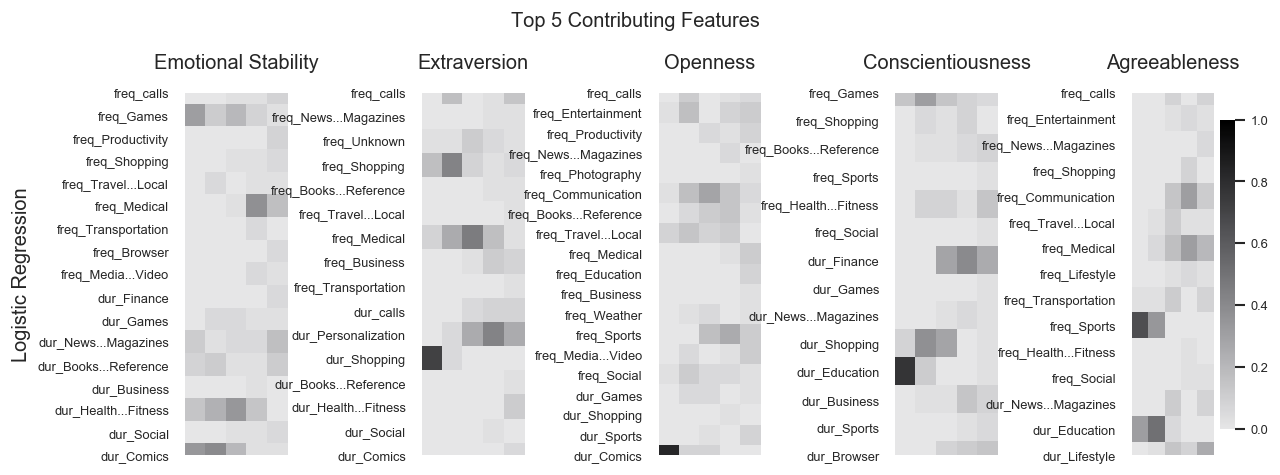

In [1155]:
sns.set(font_scale=0.7)
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)

fig,(ax1,ax2,ax3,ax4,ax5) = plt.subplots(ncols=5,figsize=(2,4))
plt.subplots_adjust(right=4.5, wspace=1.3)
plt.suptitle('Top 5 Contributing Features', fontsize=12, x = 2.0, y = 1.05)

data = df_top5_lr['Emotional Stability'].transpose() / num_test_instances
data.columns = ['1','2','3','4','5']
ax1 = sns.heatmap(data, cmap=cmap, linewidths=0, vmin=0, vmax=1, ax=ax1, cbar=False)
ax1.set_title('Emotional Stability', fontsize=12, pad=15)
ax1.set_ylabel('Logistic Regression', fontsize=12)
ax1.set_xticklabels([])
#plt.savefig('figures/lime-5-features/heatmap-LIME-LR-Emotional-Stability.png', dpi=300, bbox_inches="tight")

data = df_top5_lr['Extraversion'].transpose() / num_test_instances
data.columns = ['1','2','3','4','5']
ax2 = sns.heatmap(data, cmap=cmap, linewidths=0, vmin=0, vmax=1, ax=ax2, cbar=False)
ax2.set_title('Extraversion', fontsize=12, pad=15)
ax2.set_xticklabels([])
#plt.savefig('figures/lime-5-features/heatmap-LIME-LR-Extraversion.png', dpi=300, bbox_inches="tight")

data = df_top5_lr['Openness'].transpose() / num_test_instances
data.columns = ['1','2','3','4','5']
ax3 = sns.heatmap(data, cmap=cmap, linewidths=0, vmin=0, vmax=1, ax=ax3, cbar=False)
ax3.set_title('Openness', fontsize=12, pad=15)
ax3.set_xticklabels([])
#plt.savefig('figures/lime-5-features/heatmap-LIME-LR-Openness.png', dpi=300, bbox_inches="tight")

data = df_top5_lr['Conscientiousness'].transpose() / num_test_instances
data.columns = ['1','2','3','4','5']
ax4 = sns.heatmap(data, cmap=cmap, linewidths=0, vmin=0, vmax=1, ax=ax4, cbar=False)
ax4.set_title('Conscientiousness', fontsize=12, pad=15)
ax4.set_xticklabels([])
#plt.savefig('figures/lime-5-features/heatmap-LIME-LR-Conscientiousness.png', dpi=300, bbox_inches="tight")

data = df_top5_lr['Agreeableness'].transpose() / num_test_instances
data.columns = ['1','2','3','4','5']
ax5 = sns.heatmap(data, cmap=cmap, linewidths=0, vmin=0, vmax=1, ax=ax5)
ax5.set_title('Agreeableness', fontsize=12, pad=15)
ax5.set_xticklabels([])
#plt.savefig('figures/lime-5-features/heatmap-LIME-LR-Agreeableness.png', dpi=300, bbox_inches="tight")

fig.savefig('figures/lime-5-features/heatmap-LIME-LR',dpi=300, bbox_inches="tight")

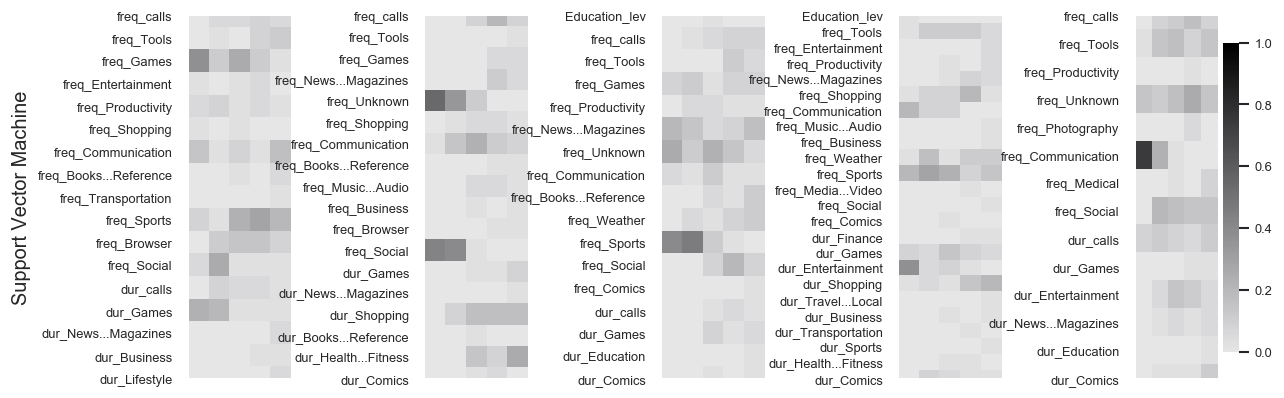

In [1142]:
sns.set(font_scale=0.7)
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)

fig,(ax1,ax2,ax3,ax4,ax5) = plt.subplots(ncols=5,figsize=(2,4))
plt.subplots_adjust(right=4.5, wspace=1.3)
#plt.suptitle('Top 5 Contributing Features', fontsize=12, x = 2.0, y = 1)

data = df_top5_svm['Emotional Stability'].transpose() / num_test_instances
data.columns = ['1','2','3','4','5']
ax1 = sns.heatmap(data, cmap=cmap, linewidths=0, vmin=0, vmax=1, ax=ax1, cbar=False)
ax1.set_xticklabels([])
#ax1.set_title('Emotional Stability')
ax1.set_ylabel('Support Vector Machine', fontsize=12)
#plt.savefig('figures/lime-5-features/heatmap-LIME-LR-Emotional-Stability.png', dpi=300, bbox_inches="tight")

data = df_top5_svm['Extraversion'].transpose() / num_test_instances
data.columns = ['1','2','3','4','5']
ax2 = sns.heatmap(data, cmap=cmap, linewidths=0, vmin=0, vmax=1, ax=ax2, cbar=False)
ax2.set_xticklabels([])
#ax2.set_title('Extraversion')
#plt.savefig('figures/lime-5-features/heatmap-LIME-LR-Extraversion.png', dpi=300, bbox_inches="tight")

data = df_top5_svm['Openness'].transpose() / num_test_instances
data.columns = ['1','2','3','4','5']
ax3 = sns.heatmap(data, cmap=cmap, linewidths=0, vmin=0, vmax=1, ax=ax3, cbar=False)
ax3.set_xticklabels([])
#ax3.set_title('Openness')
#plt.savefig('figures/lime-5-features/heatmap-LIME-LR-Openness.png', dpi=300, bbox_inches="tight")

data = df_top5_svm['Conscientiousness'].transpose() / num_test_instances
data.columns = ['1','2','3','4','5']
ax4 = sns.heatmap(data, cmap=cmap, linewidths=0, vmin=0, vmax=1, ax=ax4, cbar=False)
ax4.set_xticklabels([])
#ax4.set_title('Conscientiousness')
#plt.savefig('figures/lime-5-features/heatmap-LIME-LR-Conscientiousness.png', dpi=300, bbox_inches="tight")

data = df_top5_svm['Agreeableness'].transpose() / num_test_instances
data.columns = ['1','2','3','4','5']
ax5 = sns.heatmap(data, cmap=cmap, linewidths=0, vmin=0, vmax=1, ax=ax5)
ax5.set_xticklabels([])
#ax5.set_title('Agreeableness')
#plt.savefig('figures/lime-5-features/heatmap-LIME-LR-Agreeableness.png', dpi=300, bbox_inches="tight")

fig.savefig('figures/lime-5-features/heatmap-LIME-SVM',dpi=300, bbox_inches="tight")

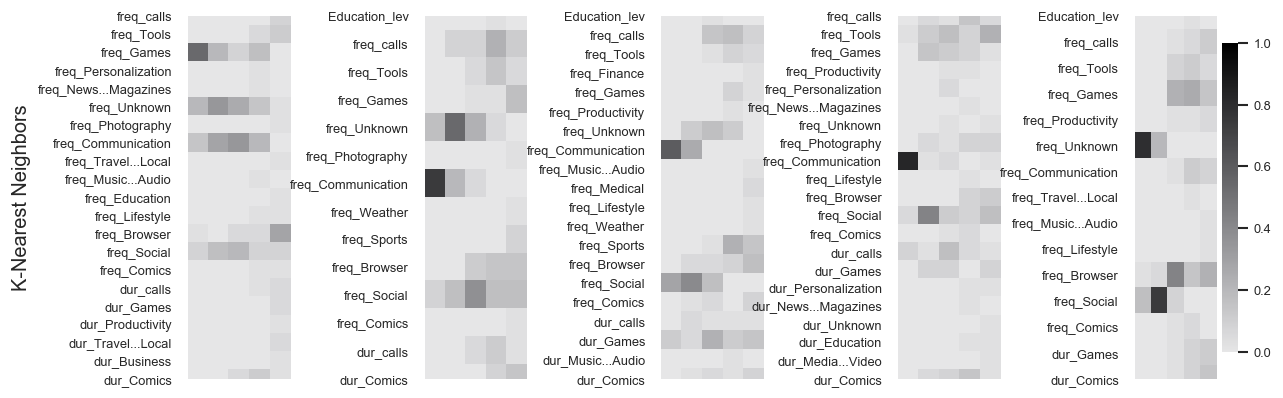

In [1141]:
sns.set(font_scale=0.7)
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)

fig,(ax1,ax2,ax3,ax4,ax5) = plt.subplots(ncols=5,figsize=(2,4))
plt.subplots_adjust(right=4.5, wspace=1.3)
#plt.suptitle('Top 5 Contributing Features', fontsize=12, x = 2.0, y = 1)

data = df_top5_knn['Emotional Stability'].transpose() / num_test_instances
data.columns = ['1','2','3','4','5']
ax1 = sns.heatmap(data, cmap=cmap, linewidths=0, vmin=0, vmax=1, ax=ax1, cbar=False)
#ax1.set_title('Emotional Stability')
ax1.set_ylabel('K-Nearest Neighbors', fontsize=12)
ax1.set_xticklabels([])
#plt.savefig('figures/lime-5-features/heatmap-LIME-LR-Emotional-Stability.png', dpi=300, bbox_inches="tight")

data = df_top5_knn['Extraversion'].transpose() / num_test_instances
data.columns = ['1','2','3','4','5']
ax2 = sns.heatmap(data, cmap=cmap, linewidths=0, vmin=0, vmax=1, ax=ax2, cbar=False)
ax2.set_xticklabels([])
#ax2.set_title('Extraversion')
#plt.savefig('figures/lime-5-features/heatmap-LIME-LR-Extraversion.png', dpi=300, bbox_inches="tight")

data = df_top5_knn['Openness'].transpose() / num_test_instances
data.columns = ['1','2','3','4','5']
ax3 = sns.heatmap(data, cmap=cmap, linewidths=0, vmin=0, vmax=1, ax=ax3, cbar=False)
ax3.set_xticklabels([])
#ax3.set_title('Openness')
#plt.savefig('figures/lime-5-features/heatmap-LIME-LR-Openness.png', dpi=300, bbox_inches="tight")

data = df_top5_knn['Conscientiousness'].transpose() / num_test_instances
data.columns = ['1','2','3','4','5']
ax4 = sns.heatmap(data, cmap=cmap, linewidths=0, vmin=0, vmax=1, ax=ax4, cbar=False)
ax4.set_xticklabels([])
#ax4.set_title('Conscientiousness')
#plt.savefig('figures/lime-5-features/heatmap-LIME-LR-Conscientiousness.png', dpi=300, bbox_inches="tight")

data = df_top5_knn['Agreeableness'].transpose() / num_test_instances
data.columns = ['1','2','3','4','5']
ax5 = sns.heatmap(data, cmap=cmap, linewidths=0, vmin=0, vmax=1, ax=ax5)
ax5.set_xticklabels([])
#ax5.set_title('Agreeableness')
#plt.savefig('figures/lime-5-features/heatmap-LIME-LR-Agreeableness.png', dpi=300, bbox_inches="tight")
fig.savefig('figures/lime-5-features/heatmap-LIME-KNN',dpi=300, bbox_inches="tight")

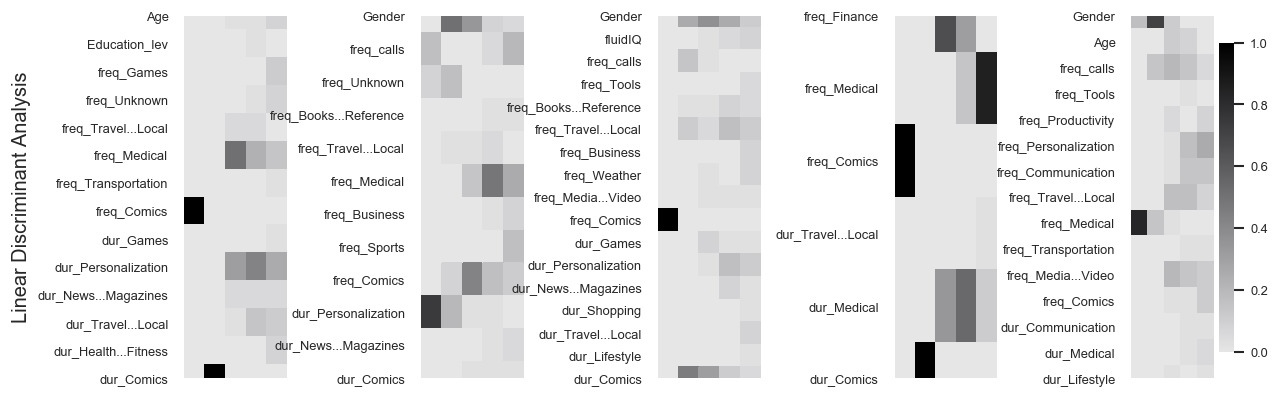

In [1140]:
sns.set(font_scale=0.7)
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)

fig,(ax1,ax2,ax3,ax4,ax5) = plt.subplots(ncols=5,figsize=(2,4))
plt.subplots_adjust(right=4.5, wspace=1.3)
#plt.suptitle('Top 5 Contributing Features', fontsize=12, x = 2.0, y = 1)

data = df_top5_lda['Emotional Stability'].transpose() / num_test_instances
data.columns = ['1','2','3','4','5']
ax1 = sns.heatmap(data, cmap=cmap, linewidths=0, vmin=0, vmax=1, ax=ax1, cbar=False)
#ax1.set_title('Emotional Stability')
ax1.set_ylabel('Linear Discriminant Analysis', fontsize=12)
ax1.set_xticklabels([])
#plt.savefig('figures/lime-5-features/heatmap-LIME-LR-Emotional-Stability.png', dpi=300, bbox_inches="tight")

data = df_top5_lda['Extraversion'].transpose() / num_test_instances
data.columns = ['1','2','3','4','5']
ax2 = sns.heatmap(data, cmap=cmap, linewidths=0, vmin=0, vmax=1, ax=ax2, cbar=False)
ax2.set_xticklabels([])
#ax2.set_title('Extraversion')
#plt.savefig('figures/lime-5-features/heatmap-LIME-LR-Extraversion.png', dpi=300, bbox_inches="tight")

data = df_top5_lda['Openness'].transpose() / num_test_instances
data.columns = ['1','2','3','4','5']
ax3 = sns.heatmap(data, cmap=cmap, linewidths=0, vmin=0, vmax=1, ax=ax3, cbar=False)
ax3.set_xticklabels([])
#ax3.set_title('Openness')
#plt.savefig('figures/lime-5-features/heatmap-LIME-LR-Openness.png', dpi=300, bbox_inches="tight")

data = df_top5_lda['Conscientiousness'].transpose() / num_test_instances
data.columns = ['1','2','3','4','5']
ax4 = sns.heatmap(data, cmap=cmap, linewidths=0, vmin=0, vmax=1, ax=ax4, cbar=False)
ax4.set_xticklabels([])
#ax4.set_title('Conscientiousness')
#plt.savefig('figures/lime-5-features/heatmap-LIME-LR-Conscientiousness.png', dpi=300, bbox_inches="tight")

data = df_top5_lda['Agreeableness'].transpose() / num_test_instances
data.columns = ['1','2','3','4','5']
ax5 = sns.heatmap(data, cmap=cmap, linewidths=0, vmin=0, vmax=1, ax=ax5)
ax5.set_xticklabels([])
#ax5.set_title('Agreeableness')
#plt.savefig('figures/lime-5-features/heatmap-LIME-LR-Agreeableness.png', dpi=300, bbox_inches="tight")
fig.savefig('figures/lime-5-features/heatmap-LIME-LDA',dpi=300, bbox_inches="tight")

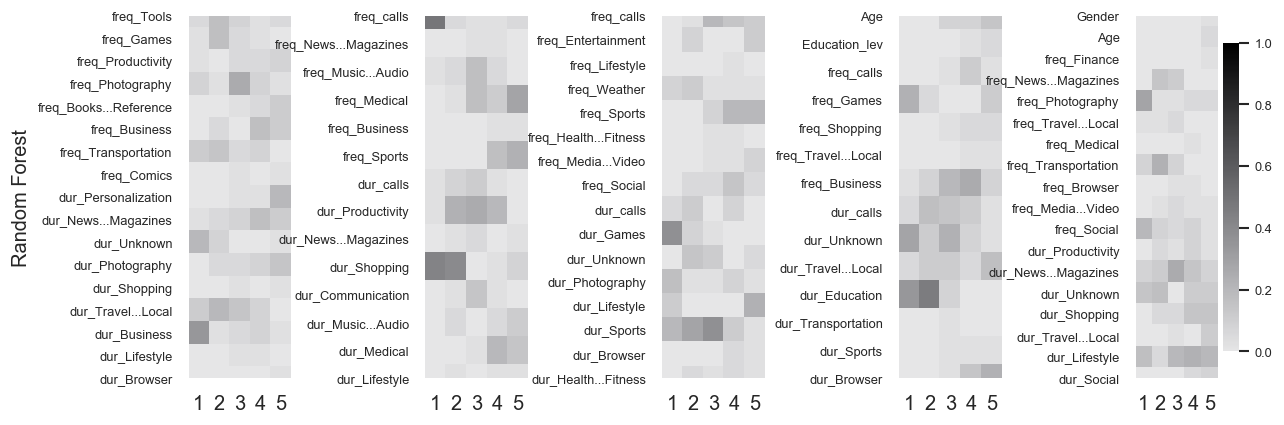

In [1128]:
sns.set(font_scale=0.7)
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)

fig,(ax1,ax2,ax3,ax4,ax5) = plt.subplots(ncols=5,figsize=(2,4))
plt.subplots_adjust(right=4.5, wspace=1.3)
#plt.suptitle('Top 5 Contributing Features', fontsize=12, x = 2.0, y = 1)

data = df_top5_rf['Emotional Stability'].transpose() / num_test_instances
data.columns = ['1','2','3','4','5']
ax1 = sns.heatmap(data, cmap=cmap, linewidths=0, vmin=0, vmax=1, ax=ax1, cbar=False)
#ax1.set_title('Emotional Stability')
ax1.set_ylabel('Random Forest', fontsize=12)
ax1.tick_params(axis="x", labelsize=12)
#plt.savefig('figures/lime-5-features/heatmap-LIME-LR-Emotional-Stability.png', dpi=300, bbox_inches="tight")

data = df_top5_rf['Extraversion'].transpose() / num_test_instances
data.columns = ['1','2','3','4','5']
ax2 = sns.heatmap(data, cmap=cmap, linewidths=0, vmin=0, vmax=1, ax=ax2, cbar=False)
#ax2.set_title('Extraversion')
ax2.tick_params(axis="x", labelsize=12)
#plt.savefig('figures/lime-5-features/heatmap-LIME-LR-Extraversion.png', dpi=300, bbox_inches="tight")

data = df_top5_rf['Openness'].transpose() / num_test_instances
data.columns = ['1','2','3','4','5']
ax3 = sns.heatmap(data, cmap=cmap, linewidths=0, vmin=0, vmax=1, ax=ax3, cbar=False)
#ax3.set_title('Openness')
ax3.tick_params(axis="x", labelsize=12)
#plt.savefig('figures/lime-5-features/heatmap-LIME-LR-Openness.png', dpi=300, bbox_inches="tight")

data = df_top5_rf['Conscientiousness'].transpose() / num_test_instances
data.columns = ['1','2','3','4','5']
ax4 = sns.heatmap(data, cmap=cmap, linewidths=0, vmin=0, vmax=1, ax=ax4, cbar=False)
#ax4.set_title('Conscientiousness')
ax4.tick_params(axis="x", labelsize=12)
#plt.savefig('figures/lime-5-features/heatmap-LIME-LR-Conscientiousness.png', dpi=300, bbox_inches="tight")

data = df_top5_rf['Agreeableness'].transpose() / num_test_instances
data.columns = ['1','2','3','4','5']
ax5 = sns.heatmap(data, cmap=cmap, linewidths=0, vmin=0, vmax=1, ax=ax5)
#ax5.set_title('Agreeableness')
ax5.tick_params(axis="x", labelsize=12)
#plt.savefig('figures/lime-5-features/heatmap-LIME-LR-Agreeableness.png', dpi=300, bbox_inches="tight")

fig.savefig('figures/lime-5-features/heatmap-LIME-RF',dpi=300, bbox_inches="tight")